# Google BigQuery Connect with Jupyter notebook

In [1]:
import pydata_google_auth
credentials = pydata_google_auth.get_user_credentials(
    ['https://www.googleapis.com/auth/bigquery'],
)

### Import Python module

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [3]:
query2 = """SELECT *
FROM SELECT_PRIMARY_TYPE.PT""" 
project_id = 'modular-magpie-255714'

In [4]:
crime_df = pd.read_gbq(query2, project_id=project_id, dialect='standard', credentials=credentials)

In [5]:
crime = list(crime_df["Primary_Type"])

# 3. 공휴일(새해, 크리스마스나 할로윈 등)과 장소

* 1월 1일
* 7월 4일
* 10월 31일
* 12월 25일

In [34]:
date = ["1-1","7-4","10-31","12-25"]

In [8]:
query = """SELECT *
FROM place.holi_place1""" 
project_id = 'modular-magpie-255714'

In [9]:
place = pd.read_gbq(query, project_id=project_id, dialect='standard', credentials=credentials)

In [10]:
place.head()

,Primary_Type,Year,Month,Day,YMD,Date,Timezone,Holiday,Latitude,Longitude
0,ARSON,2001,1,14,2001-1-14,1-14,21,HOLI_B,41.833483,-87.639020
1,ARSON,2001,1,15,2001-1-15,1-15,4,HOLIDAY,41.939076,-87.736658
2,ARSON,2001,2,13,2001-2-13,2-13,1,SPE_B,41.864433,-87.705464
3,ARSON,2001,2,13,2001-2-13,2-13,7,SPE_B,41.783812,-87.669321
4,ARSON,2001,2,13,2001-2-13,2-13,12,SPE_B,41.870021,-87.659985


STALKING
1-1
7-4
10-31
12-25


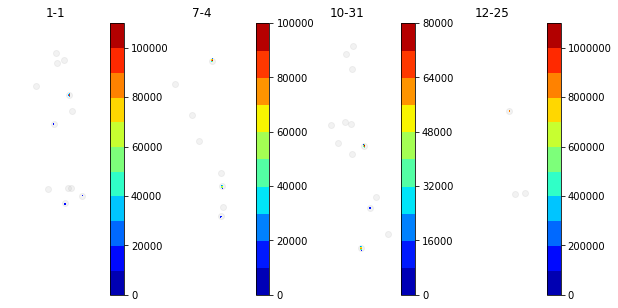



ARSON
1-1
7-4
10-31
12-25


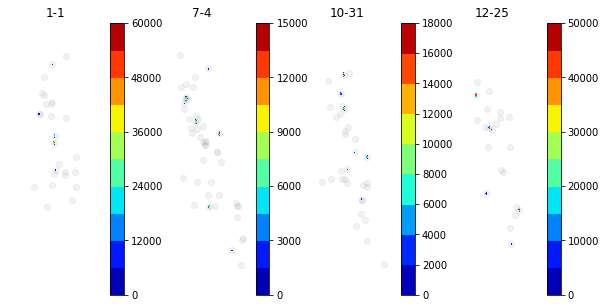



HOMICIDE
1-1
7-4
10-31
12-25


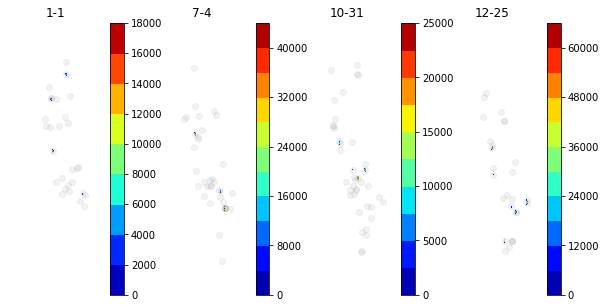



CRIMINAL TRESPASS
1-1
7-4
10-31
12-25


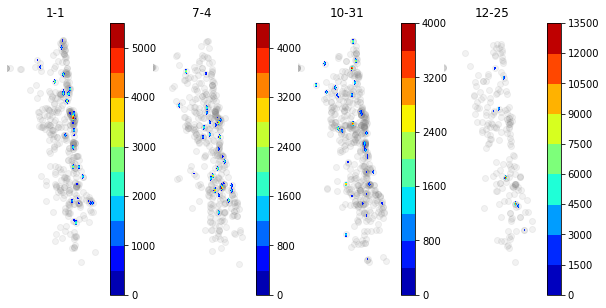



GAMBLING
1-1
7-4
10-31
12-25


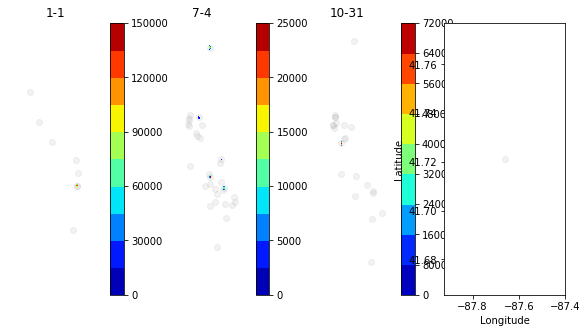



BATTERY
1-1
7-4
10-31
12-25


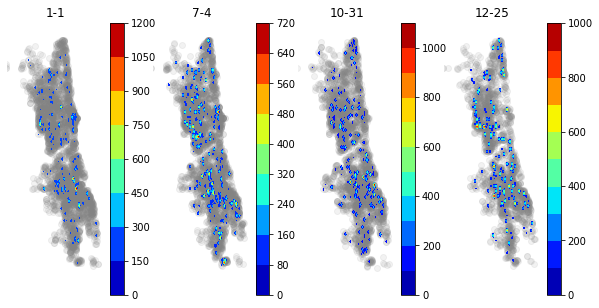



INTIMIDATION
1-1
7-4
10-31
12-25


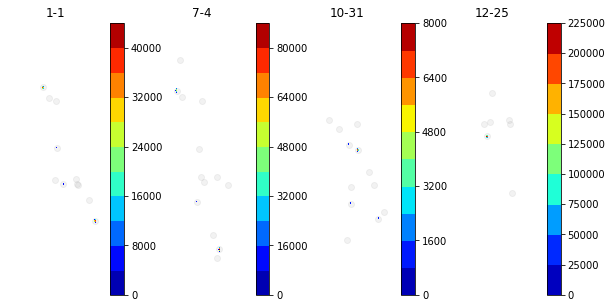



CRIMINAL DAMAGE
1-1
7-4
10-31
12-25


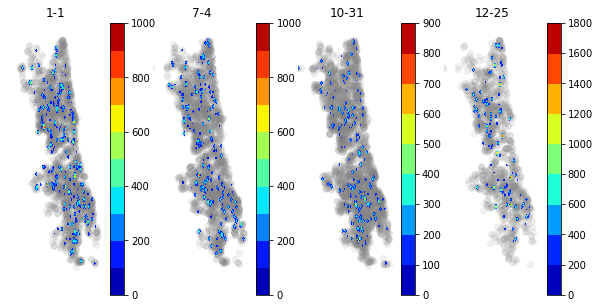



PROSTITUTION
1-1
7-4
10-31
12-25


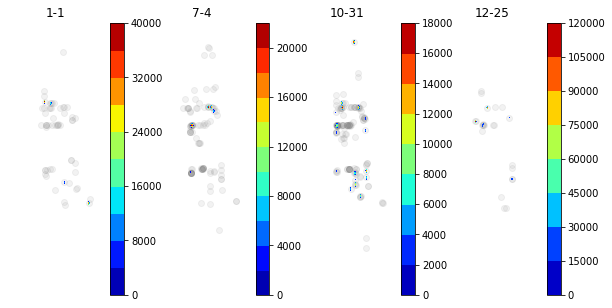



SEX OFFENSE
1-1
7-4
10-31
12-25


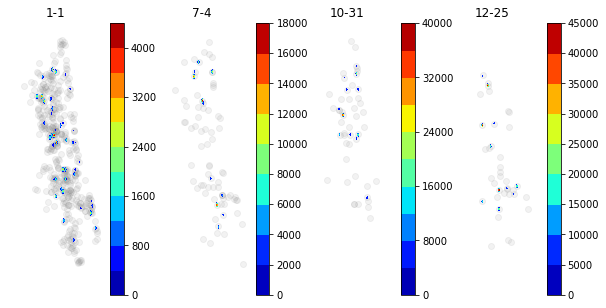



CRIM SEXUAL ASSAULT
1-1
7-4
10-31
12-25


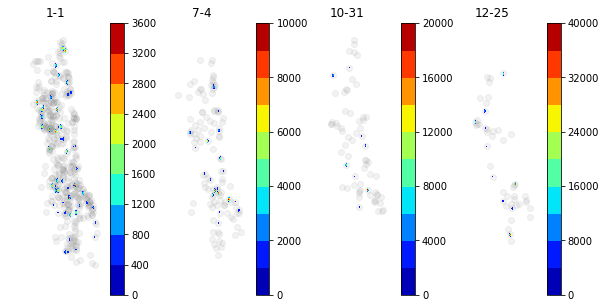



THEFT
1-1
7-4
10-31
12-25


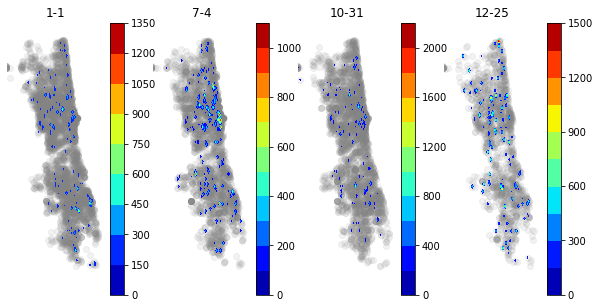



LIQUOR LAW VIOLATION
1-1
7-4
10-31
12-25


c:\users\julia\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\kde.py:570: RuntimeWarning:

invalid value encountered in sqrt



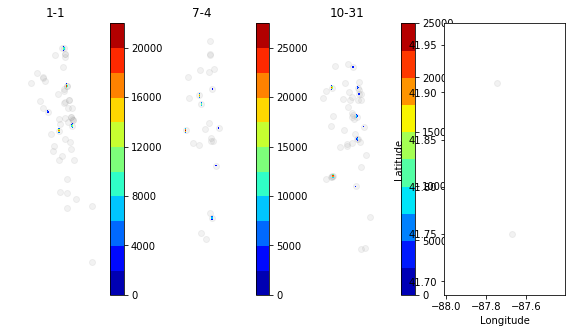



KIDNAPPING
1-1
7-4
10-31
12-25


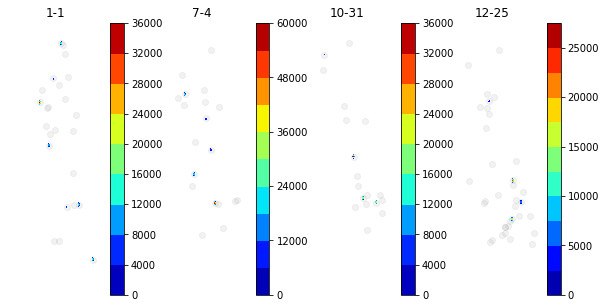



OFFENSE INVOLVING CHILDREN
1-1
7-4
10-31
12-25


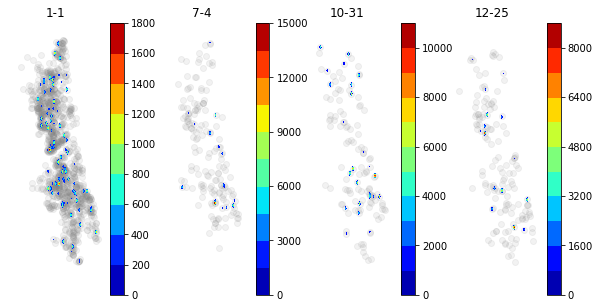



BURGLARY
1-1
7-4
10-31
12-25


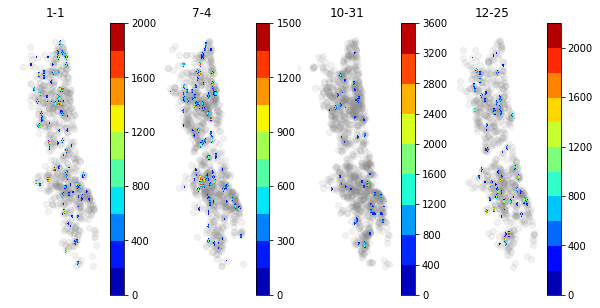



MOTOR VEHICLE THEFT
1-1
7-4
10-31
12-25


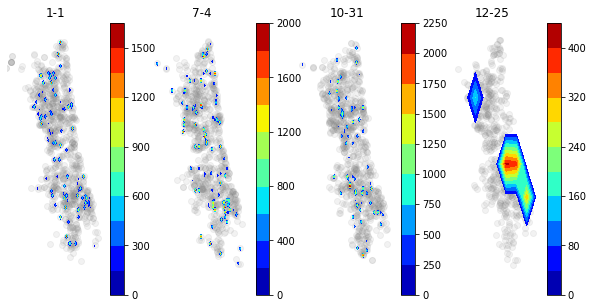



WEAPONS VIOLATION
1-1
7-4
10-31
12-25


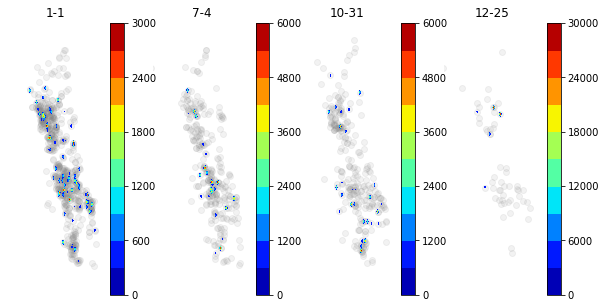



NARCOTICS
1-1
7-4
10-31
12-25


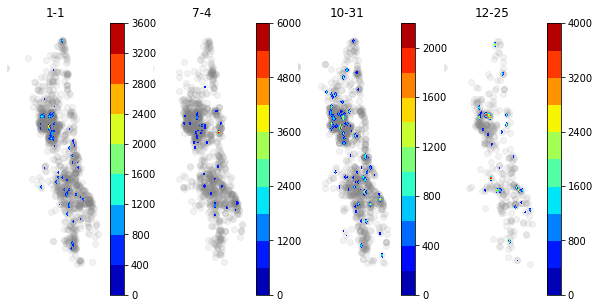



DECEPTIVE PRACTICE
1-1
7-4
10-31
12-25


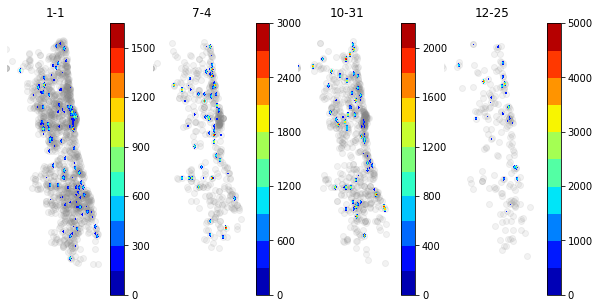



INTERFERENCE WITH PUBLIC OFFICER
1-1
7-4
10-31
12-25


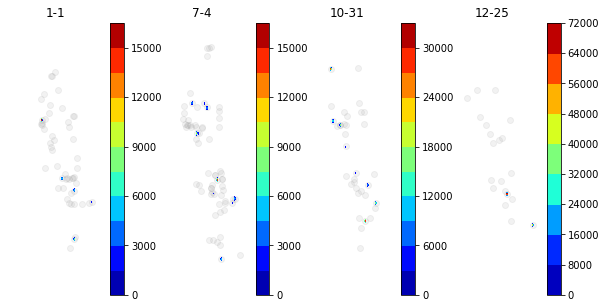



PUBLIC PEACE VIOLATION
1-1
7-4
10-31
12-25


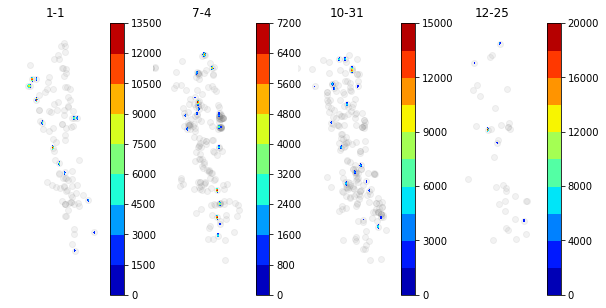



ROBBERY
1-1
7-4
10-31
12-25


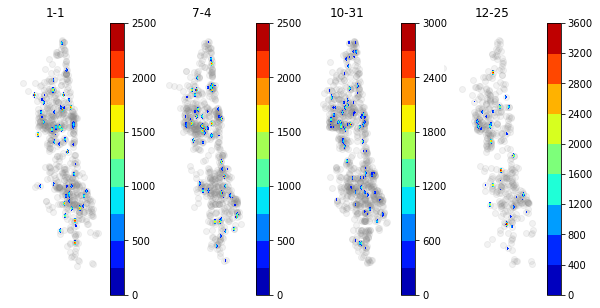



ASSAULT
1-1
7-4
10-31
12-25


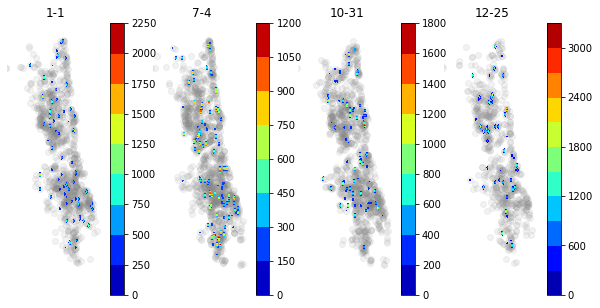

In [44]:
for i, crime_type in enumerate(crime):
    fig = plt.figure(figsize=(10,5))
    print(crime_type)
    crimes_ = place[place['Primary_Type']==crime_type]
    
    for k, y in enumerate(date):
        print(y)
        
        cc = crimes_[crimes_['Date']==y]
        
        try:
            ax = fig.add_subplot(int(np.ceil(float(len(date)) / 4)), 4, k+1)
        
            sns.regplot('Longitude', 'Latitude',
                       data=  cc[['Longitude','Latitude']],
                       fit_reg=False,
                       scatter_kws={'alpha':.1, 'color':'grey'},
                       ax=ax)
            sns.kdeplot(X='Longitude', Y='Latitude',
                        data=  cc[['Longitude','Latitude']],
                        cmap="jet", 
                        bw=.005,
                        #n_levels=10,
                        cbar=True, 
                        shade=True, 
                        shade_lowest=False,
                        ax = ax)
            ax.set_title(y)
            ax.set_xlim(-87.9,-87.5)
            ax.set_ylim(41.60,42.05)
            ax.set_axis_off()    
        except:
            continue
    plt.show()
    print()
    print()

## Location Description

In [51]:
query = """SELECT *
FROM place.holi_place1_temp""" 
project_id = 'modular-magpie-255714'

In [52]:
place2 = pd.read_gbq(query, project_id=project_id, dialect='standard', credentials=credentials)

In [53]:
place2

,Primary_Type,Year,Month,Day,Location_Description,YMD,Date,Timezone,Holiday,Latitude,Longitude
0,ARSON,2001,1,3,STREET,2001-1-3,1-3,22,NONE,41.887508,-87.702649
1,ARSON,2001,1,4,RESIDENCE,2001-1-4,1-4,18,NONE,41.798741,-87.605075
2,ARSON,2001,1,5,OTHER,2001-1-5,1-5,13,NONE,41.758668,-87.555422
3,ARSON,2001,1,5,APARTMENT,2001-1-5,1-5,15,NONE,41.753302,-87.646687
4,ARSON,2001,1,5,RESIDENCE PORCH/HALLWAY,2001-1-5,1-5,19,NONE,41.965930,-87.706097
5,ARSON,2001,1,6,STREET,2001-1-6,1-6,1,NONE,41.945040,-87.687140
6,ARSON,2001,1,6,RESIDENCE PORCH/HALLWAY,2001-1-6,1-6,5,NONE,41.745913,-87.602752
7,ARSON,2001,1,6,APARTMENT,2001-1-6,1-6,18,NONE,41.775533,-87.646963
8,ARSON,2001,1,6,STREET,2001-1-6,1-6,23,NONE,41.785384,-87.627740
9,ARSON,2001,1,8,VEHICLE NON-COMMERCIAL,2001-1-8,1-8,20,NONE,41.871035,-87.687493


In [50]:
place2.sort_values(["Primary_Type","Year","Month","Day","Timezone","Location_Description"])

,Primary_Type,Year,Month,Day,Location_Description,YMD,Date,Timezone,Holiday,Latitude,Longitude
0,ARSON,2001,1,14,RESIDENCE,2001-1-14,1-14,21,HOLI_B,41.833483,-87.639020
1,ARSON,2001,1,15,VEHICLE NON-COMMERCIAL,2001-1-15,1-15,4,HOLIDAY,41.939076,-87.736658
2,ARSON,2001,2,13,GROCERY FOOD STORE,2001-2-13,2-13,1,SPE_B,41.864433,-87.705464
3,ARSON,2001,2,13,STREET,2001-2-13,2-13,7,SPE_B,41.783812,-87.669321
4,ARSON,2001,2,13,CHA APARTMENT,2001-2-13,2-13,12,SPE_B,41.870021,-87.659985
5,ARSON,2001,2,15,CHA APARTMENT,2001-2-15,2-15,21,SPE_A,41.880330,-87.688509
6,ARSON,2001,2,19,GROCERY FOOD STORE,2001-2-19,2-19,4,HOLIDAY,41.749831,-87.689358
7,ARSON,2001,2,19,RESIDENCE-GARAGE,2001-2-19,2-19,9,HOLIDAY,41.810349,-87.685671
8,ARSON,2001,2,19,STREET,2001-2-19,2-19,22,HOLIDAY,41.782382,-87.710936
9,ARSON,2001,2,19,RESIDENCE,2001-2-19,2-19,23,HOLIDAY,41.760799,-87.706519
